In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
class MyLinearRegression():
	def __init__(self, thetas, alpha=0.01, max_iter=100):
		if not isinstance(thetas, np.ndarray) or not isinstance(alpha, float) or not isinstance(max_iter, int):
			print("Error")
			return
		elif thetas.size <= 0 or alpha <= 0 or max_iter <= 0:
			print("Error")
			return
		elif thetas.ndim != 2 or thetas.shape[1] != 1:
			print("Error")
			return
		self.thetas = thetas
		self.alpha = alpha
		self.max_iter = max_iter
	
	def zscore(self, x):
		if not isinstance(x, np.ndarray):
			return
		elif x.size <= 0 or x.ndim != 2:
			return
		return (x - x.mean()) / x.std()

	def minmax(self, x):
		if not isinstance(x, np.ndarray):
			return
		elif x.size <= 0 or x.ndim != 2:
			return
		x_diff = x.max() - x.min()
		return (x - x.min()) / x_diff
		
	def predict_(self, x):
		if not isinstance(x, np.ndarray) or not isinstance(self.thetas, np.ndarray):
			return
		elif x.size <= 0 or self.thetas.size <= 0:
			return
		elif x.ndim != 2 or self.thetas.ndim != 2:
			return

		m, n = x.shape

		X_Prime = np.hstack((np.ones((m, 1)), x))

		if self.thetas.shape != (n + 1, 1):
			return

		return X_Prime @ self.thetas
	
	def mse_(self, y, y_hat):
		m = y.shape[0]

		error = y_hat - y

		return 1 / m * error.T @ error

	def fit_(self, x, y):
		if not isinstance(x, np.ndarray) or not isinstance(y, np.ndarray) or not isinstance(self.thetas, np.ndarray):
			return
		elif x.size <= 0 or y.size <= 0 or self.thetas.size <= 0:
			return
		elif x.ndim != 2 or y.ndim != 2 or self.thetas.ndim != 2:
			return
		m, n = x.shape
		if y.shape != (m, 1) or self.thetas.shape != (n + 1, 1):
			return

		self.thetas = self.thetas.astype(np.float64)
		
		for _ in range(self.max_iter):
			y_hat = self.predict_(x)

			error = y_hat - y

			X_Prime = np.hstack((np.ones((m, 1)), x))

			gradient = 1 / m * X_Prime.T @ error

			self.thetas -= self.alpha * gradient


In [58]:
data = pd.read_csv("spacecraft_data.csv")

X = np.array(data[['Age', 'Thrust_power', 'Terameters']])
print(X.shape) #(m, 2)

Y = np.array(data[["Sell_price"]])
print(Y.shape) #(m, 1)


model = MyLinearRegression(thetas=np.array([1.0, 1.0, 1.0, 1.0]).reshape(-1, 1), alpha=9e-5, max_iter=50000)

model.fit_(X, Y)

Y_HAT = model.predict_(X)

(200, 3)
(200, 1)


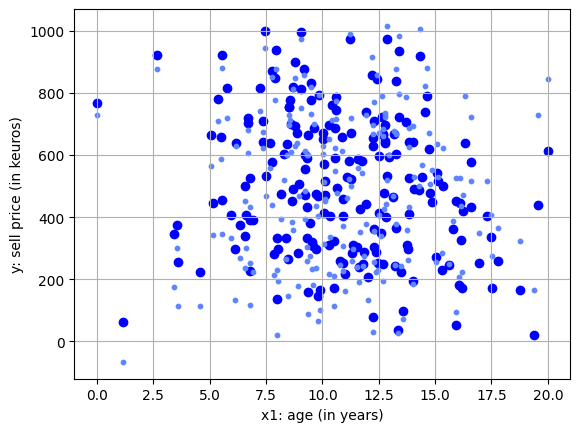

In [65]:
X_AGE = X[:, 0]
plt.scatter(X_AGE, Y, color="#0000ff")
plt.scatter(X_AGE, Y_HAT, color="#5f84ff", s=10)
plt.xlabel("x1: age (in years)")
plt.ylabel("y: sell price (in keuros)")
plt.grid(True)
plt.show()

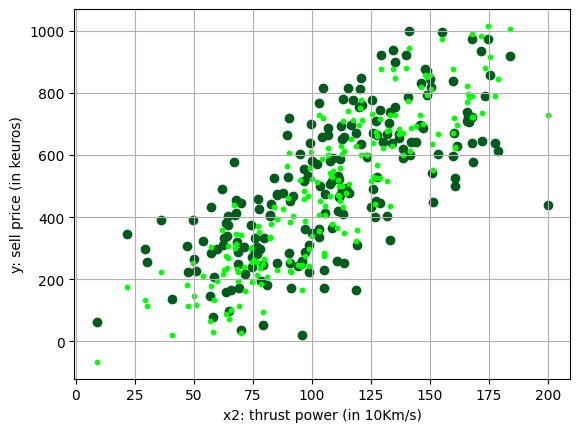

In [66]:
X_THRUST = X[:, 1]
plt.scatter(X_THRUST, Y, color="#005c1c")
plt.scatter(X_THRUST, Y_HAT, color="#00ff00", s=10)
plt.xlabel("x2: thrust power (in 10Km/s)")
plt.ylabel("y: sell price (in keuros)")
plt.grid(True)
plt.show()

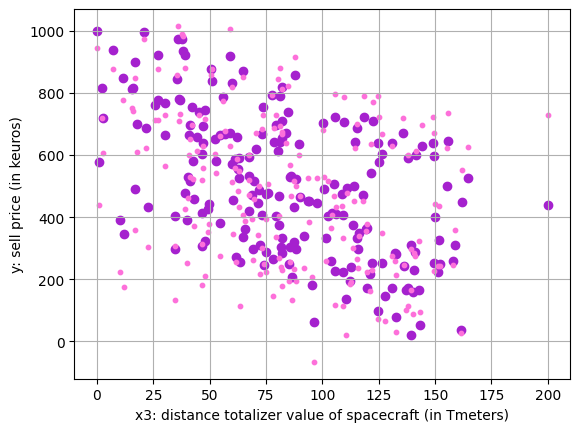

In [67]:
X_METERS = X[:, 2]
plt.scatter(X_METERS, Y, color="#a521ce")
plt.scatter(X_METERS, Y_HAT, color="#fd70da", s=10)
plt.xlabel("x3: distance totalizer value of spacecraft (in Tmeters)")
plt.ylabel("y: sell price (in keuros)")
plt.grid(True)
plt.show()